# Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#Reading the file
file=pd.read_csv('penguins.csv')


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


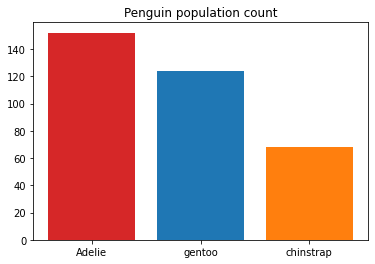

ValueError: could not convert string to float: 'Adelie'

In [3]:
# print penguins:
fig, ax = plt.subplots()
x = ['Adelie', 'gentoo', 'chinstrap']
y = file['species'].value_counts()
print(y)
bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
ax.bar(x, y, label=bar_labels, color=bar_colors)
plt.title("Penguin population count")
plt.show()

# correlation matrix
correlation_matrix=file.corr()
print('Correlation Matrix:\n', correlation_matrix)

fig=plt.figure(figsize=(10,10))
ax=sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [4]:
# first function describe()
file.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
#second function head()
file.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
speciesName=pd.unique(file['species'])
print(speciesName)

['Adelie' 'Gentoo' 'Chinstrap']


In [7]:
uniqueSpecies=file['species'].unique()
print(uniqueSpecies)
speciesMap={'Adelie':0,'Gentoo':1, 'Chinstrap':2}
file['species']=file['species'].map(speciesMap)


uniqueIsland=file['island'].unique()
print(uniqueIsland)
islandMap={'Torgersen':0 , 'Biscoe':1 , 'Dream': 2}
file['island']=file['island'].map(islandMap)


genderMap={'male':0, 'female':1}
file['gender']=file['gender'].map(genderMap)
file.fillna(0, inplace=True)

print(file.head(10))

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       0            39.1           18.7              181.0   
1        0       0            39.5           17.4              186.0   
2        0       0            40.3           18.0              195.0   
3        0       0             0.0            0.0                0.0   
4        0       0            36.7           19.3              193.0   
5        0       0            39.3           20.6              190.0   
6        0       0            38.9           17.8              181.0   
7        0       0            39.2           19.6              195.0   
8        0       0            34.1           18.1              193.0   
9        0       0            42.0           20.2              190.0   

   body_mass_g  gender  year  
0       3750.0     0.0  2007  
1       3800.0     1.0  2007  
2       3250.0     1.0  2007  
3          0.0     0

In [8]:
# deleting the rows that have NAN values
nan_count_before = file.isna().sum().sum()
print(f'Number of NaN values before dropping: {nan_count_before}')

file.dropna(inplace=True)
nan_count_after = file.isna().sum().sum()
print(f'Number of NaN values after dropping: {nan_count_after}')

Number of NaN values before dropping: 0
Number of NaN values after dropping: 0


Correlation Matrix:
                     species    island  bill_length_mm  bill_depth_mm  \
species            1.000000  0.455317        0.676882      -0.138144   
island             0.455317  1.000000        0.230716       0.192929   
bill_length_mm     0.676882  0.230716        1.000000       0.122394   
bill_depth_mm     -0.138144  0.192929        0.122394       1.000000   
flipper_length_mm  0.260090 -0.039340        0.763654       0.078684   
body_mass_g        0.203945 -0.145261        0.665226      -0.159841   
gender             0.009862  0.020971       -0.236221      -0.254750   
year              -0.007279 -0.000484        0.047696      -0.048574   

                   flipper_length_mm  body_mass_g    gender      year  
species                     0.260090     0.203945  0.009862 -0.007279  
island                     -0.039340    -0.145261  0.020971 -0.000484  
bill_length_mm              0.763654     0.665226 -0.236221  0.047696  
bill_depth_mm               0.078684    -0

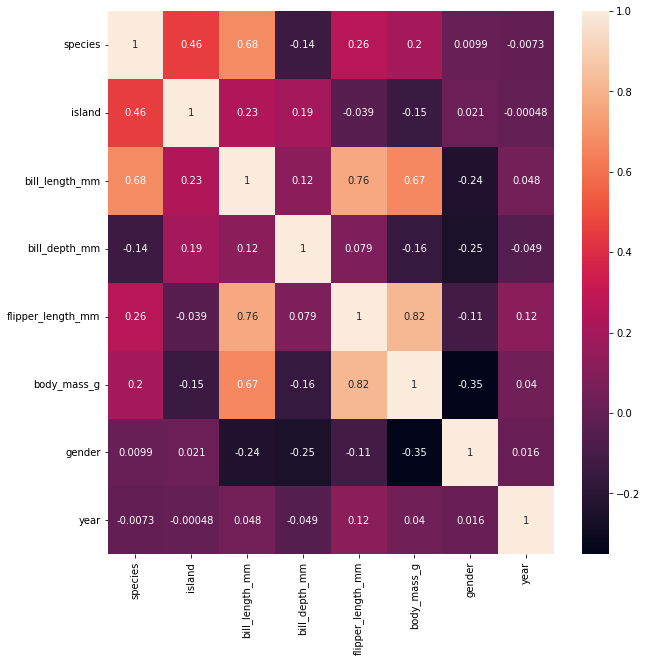

In [9]:
# correlation matrix
correlation_matrix=file.corr()
print('Correlation Matrix:\n', correlation_matrix)

fig=plt.figure(figsize=(10,10))
ax=sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [10]:
#Dropping columns "year" and "gender" as the correlation graph indicates they have no correlation with the speacies.
file.drop(['year', 'gender'], axis=1, inplace=True)
file.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,0,39.1,18.7,181.0,3750.0
1,0,0,39.5,17.4,186.0,3800.0
2,0,0,40.3,18.0,195.0,3250.0
3,0,0,0.0,0.0,0.0,0.0
4,0,0,36.7,19.3,193.0,3450.0


In [11]:
# data points
x = file[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = file['species']

In [12]:
def colorCode(elem):
    is_mismatch = elem.ne(elem[0])
    return ['color: red' if v else '' for v in is_mismatch]

C:\Users\acidl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acidl\AppData\Local\Temp\ipykernel_8728\3417272065.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  is_mismatch = elem.ne(elem[0])


,Actual Species,Predicted Species
0,adelie,adelie
1,adelie,adelie
2,adelie,adelie
3,adelie,adelie
4,adelie,adelie
5,adelie,adelie
6,adelie,adelie
7,adelie,gentoo
8,adelie,adelie
9,adelie,gentoo


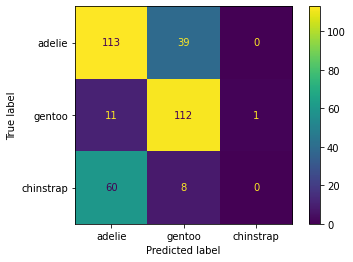

In [13]:
# Start LG algo 10 interations
lg = LogisticRegression(max_iter=10)
lg.fit(x, y)
yPred = lg.predict(x)
result = pd.DataFrame({'Actual Species' : y, 'Predicted Species' : yPred})

#Confusion matrix
cm = confusion_matrix(y, yPred)
cmGraph = ConfusionMatrixDisplay(cm, display_labels=['adelie', 'gentoo', 'chinstrap'])
cmGraph.plot()

# Remapping int values to respective string values
speciesMap={0:'adelie',1:'gentoo',2:'chinstrap'}
result['Predicted Species']=result['Predicted Species'].map(speciesMap)
result['Actual Species']=result['Actual Species'].map(speciesMap)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
result.style.apply(colorCode, axis=1)
#print(result)

C:\Users\acidl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acidl\AppData\Local\Temp\ipykernel_8728\3417272065.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  is_mismatch = elem.ne(elem[0])


,Actual Species,Predicted Species
0,adelie,adelie
1,adelie,adelie
2,adelie,adelie
3,adelie,adelie
4,adelie,adelie
5,adelie,adelie
6,adelie,adelie
7,adelie,adelie
8,adelie,adelie
9,adelie,adelie


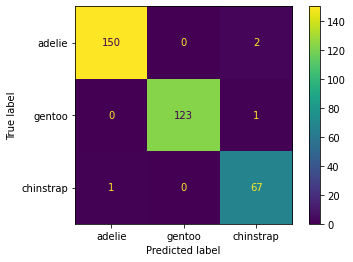

In [14]:
# Start LG algo 100 iterations
lg = LogisticRegression(max_iter=100)
lg.fit(x, y)
yPred = lg.predict(x)
result = pd.DataFrame({'Actual Species' : y, 'Predicted Species' : yPred})

#Confusion matrix
cm = confusion_matrix(y, yPred)
cmGraph = ConfusionMatrixDisplay(cm, display_labels=['adelie', 'gentoo', 'chinstrap'])
cmGraph.plot()

# Remapping int values to respective string values
speciesMap={0:'adelie',1:'gentoo',2:'chinstrap'}
result['Predicted Species']=result['Predicted Species'].map(speciesMap)
result['Actual Species']=result['Actual Species'].map(speciesMap)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
result.style.apply(colorCode, axis=1)
#print(result)

Runtime in seconds:  0.758486270904541


C:\Users\acidl\AppData\Local\Temp\ipykernel_8728\3417272065.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  is_mismatch = elem.ne(elem[0])


,Actual Species,Predicted Species
0,adelie,adelie
1,adelie,adelie
2,adelie,adelie
3,adelie,adelie
4,adelie,adelie
5,adelie,adelie
6,adelie,adelie
7,adelie,adelie
8,adelie,adelie
9,adelie,adelie


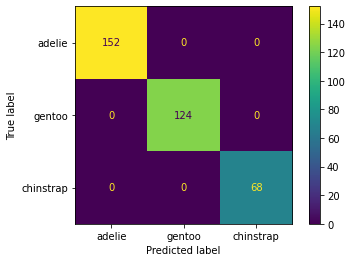

In [15]:
# Start LG algo 3000 iterations
start = time.time()
lg = LogisticRegression(max_iter=3000)
lg.fit(x, y)
yPred = lg.predict(x)
result = pd.DataFrame({'Actual Species' : y, 'Predicted Species' : yPred})

#Confusion matrix
cm = confusion_matrix(y, yPred)
cmGraph = ConfusionMatrixDisplay(cm, display_labels=['adelie', 'gentoo', 'chinstrap'])
cmGraph.plot()

# Remapping int values to respective string values
speciesMap={0:'adelie',1:'gentoo',2:'chinstrap'}
result['Predicted Species']=result['Predicted Species'].map(speciesMap)
result['Actual Species']=result['Actual Species'].map(speciesMap)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
print("Runtime in seconds: ", (time.time() - start))
result.style.apply(colorCode, axis=1)
#print(result)

Random Forest Model Accuracy: 100.00%
Runtime in seconds:  0.09640121459960938


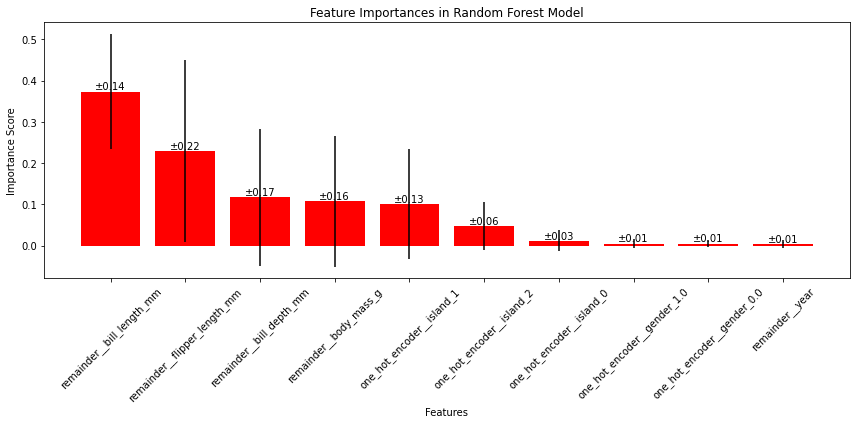

C:\Users\acidl\AppData\Local\Temp\ipykernel_8728\3417272065.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  is_mismatch = elem.ne(elem[0])


,Actual Species,Predicted Species
0,Adelie,Adelie
1,Adelie,Adelie
2,Adelie,Adelie
3,Adelie,Adelie
4,Adelie,Adelie
5,Adelie,Adelie
6,Adelie,Adelie
7,Adelie,Adelie
8,Adelie,Adelie
9,Adelie,Adelie


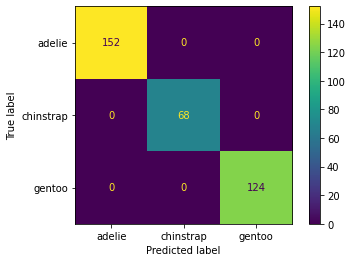

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


data = pd.read_csv('penguins.csv')

imputer = SimpleImputer(strategy='mean')
data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = imputer.fit_transform(
    data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
)

# Define the mappings for categorical features
species_map = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
island_map = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
gender_map = {'male': 0, 'female': 1}

# Map the categorical features
data['species'] = data['species'].map(species_map)
data['island'] = data['island'].map(island_map)
data['gender'] = data['gender'].map(gender_map)

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Separate the features and the target
X = data.drop('species', axis=1)
y = data['species']

start = time.time()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for one-hot encoding the categorical features
ct = ColumnTransformer(transformers=[
    ('one_hot_encoder', OneHotEncoder(), ['island', 'gender'])],
    remainder='passthrough')

# Apply the column transformer to the training data
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Random forest
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy:.2%}')
print("Runtime in seconds: ", (time.time() - start))


def predict_penguin_species(model, features, column_transformer):
    features_transformed = column_transformer.transform(pd.DataFrame([features]))

    species_code = model.predict(features_transformed)[0]

    species = {value: key for key, value in species_map.items()}[species_code]

    return species



# Example features for prediction
example_features = {
    'island': island_map['Biscoe'],
    'bill_length_mm': 4,
    'bill_depth_mm': 10,
    'flipper_length_mm': 119,
    'body_mass_g': 2000,
    'gender': gender_map['male'] ,
    'year':2000
}

toSpecies = {0:'Adelie', 1:'Gentoo', 2:'Chinstrap'}
actual = []
predicted = []
# Predict the species
for index, d in data.iterrows():
  features = {
    'island': d['island'],
    'bill_length_mm': d['bill_length_mm'],
    'bill_depth_mm': d['bill_depth_mm'],
    'flipper_length_mm': d['flipper_length_mm'],
    'body_mass_g': d['body_mass_g'],
    'gender': d['gender'],
    'year':d['year']
  }

  predicted_species = predict_penguin_species(rf, features, ct)
  actual.append(toSpecies[d['species']])
  predicted.append(predicted_species)

results = pd.DataFrame({
    'Actual Species': actual,
    'Predicted Species': predicted
})

importances = rf.feature_importances_
std_dev = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Feature names before one-hot encoding
original_feature_names = X.columns.tolist()

# After one-hot encoding in the ColumnTransformer
transformed_feature_names = ct.get_feature_names_out()

# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Random Forest Model")
bars = plt.bar(range(X_train.shape[1]), importances[indices], color="red", yerr=std_dev[indices], align="center")

# Adding feature names to the bars
plt.xticks(range(X_train.shape[1]), transformed_feature_names[indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')

# Explanation of error bars
for bar, std in zip(bars, std_dev[indices]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'±{std:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

cm = confusion_matrix(actual, predicted)
cmGraph = ConfusionMatrixDisplay(cm, display_labels=['adelie', 'chinstrap', 'gentoo'])
cmGraph.plot()

results.style.apply(colorCode, axis=1)